**Importing dependecies**

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**----- DATA ANALYSIS & PRE PROCESSING-----**

**Loading the dataset and initial data analysis**

In [ ]:
dataset = pd.read_csv("houseprice_dataset.csv")  #reading the dataset

In [ ]:
dataset.head()   #gives 1st 5 rows

,area,price
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [ ]:
dataset.tail() #gives last 5 rows

,area,price
1455,7917,175000
1456,13175,210000
1457,9042,266500
1458,9717,142125
1459,9937,147500


In [ ]:
dataset.shape #dimension of the dataset

(1460, 2)

In [ ]:
dataset.info() #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    1460 non-null   int64
 1   price   1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


In [ ]:
dataset.describe() #statistical info about the dataset

,area,price
count,1460.000000,1460.000000
mean,10516.828082,180921.195890
std,9981.264932,79442.502883
min,1300.000000,34900.000000
25%,7553.500000,129975.000000
50%,9478.500000,163000.000000
75%,11601.500000,214000.000000
max,215245.000000,755000.000000


**---- VISUALIZATON ----**  

**Visualizing the data to check data distribution and outliers**

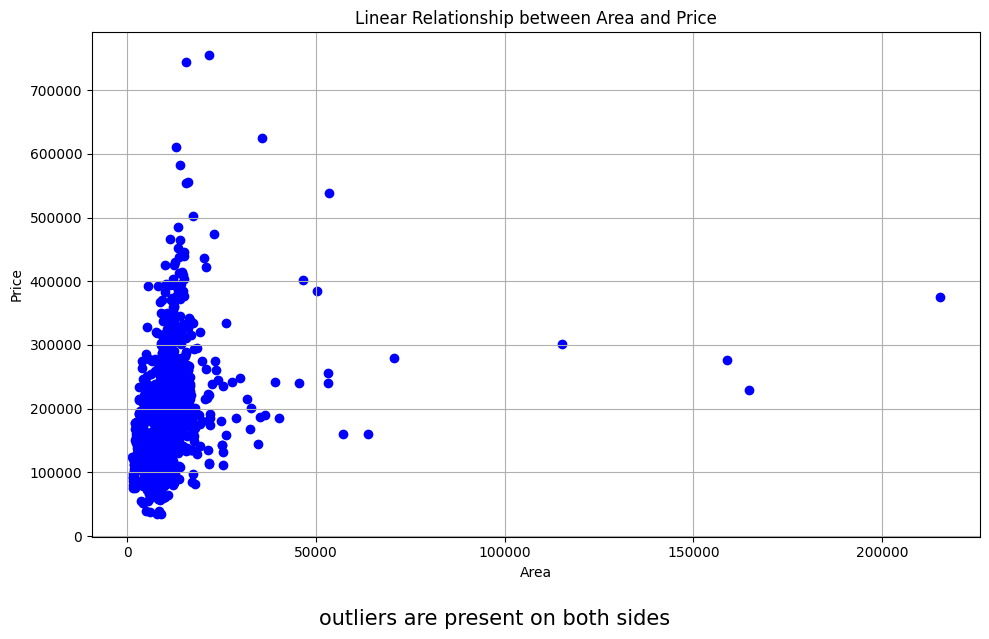

In [ ]:
plt.figure(figsize=(10,6)) #creating empty figure
plt.scatter(dataset['area'], dataset['price'], color='blue', label='Actual Data') #plotting the data
# plt.plot(dataset['area'], dataset['price'], color='red', label='Regression Line')
plt.xlabel("Area") #x label
plt.ylabel("Price") #y label
plt.title("Linear Relationship between Area and Price") #title
plt.figtext(0.5, -0.05, s='outliers are present on both sides', ha='center', fontsize=15) #description
plt.tight_layout() #tight fit
plt.grid() #enable grids
plt.show() 

**REMOVING OUTLIERS FROM THE DATA USING IQR Technique**

In [ ]:
Q1 = dataset.quantile(0.25) #25th percentile into Q1 (refer dataset statistics)
Q3 = dataset.quantile(0.75) #75th percentile into Q3
IQR = Q3 - Q1 #difference is IQR

lower_bound = Q1 - 1.5 * IQR #lower bound of the data
upper_bound = Q3 + 1.5 * IQR #upper bound of the data

#Keeping only data within bounds on both columns
df_clean = dataset[
    (dataset['area'] >= lower_bound['area']) & (dataset['area'] <= upper_bound['area']) & 
    (dataset['price'] >= lower_bound['price']) & (dataset['price'] <= upper_bound['price'])
]

print(f"Original dataset size: {len(dataset)} rows")
print(f"Cleaned dataset size: {len(df_clean)} rows")


Original dataset size: 1460 rows
Cleaned dataset size: 1339 rows


**Visualizing the data after removing the outliers**

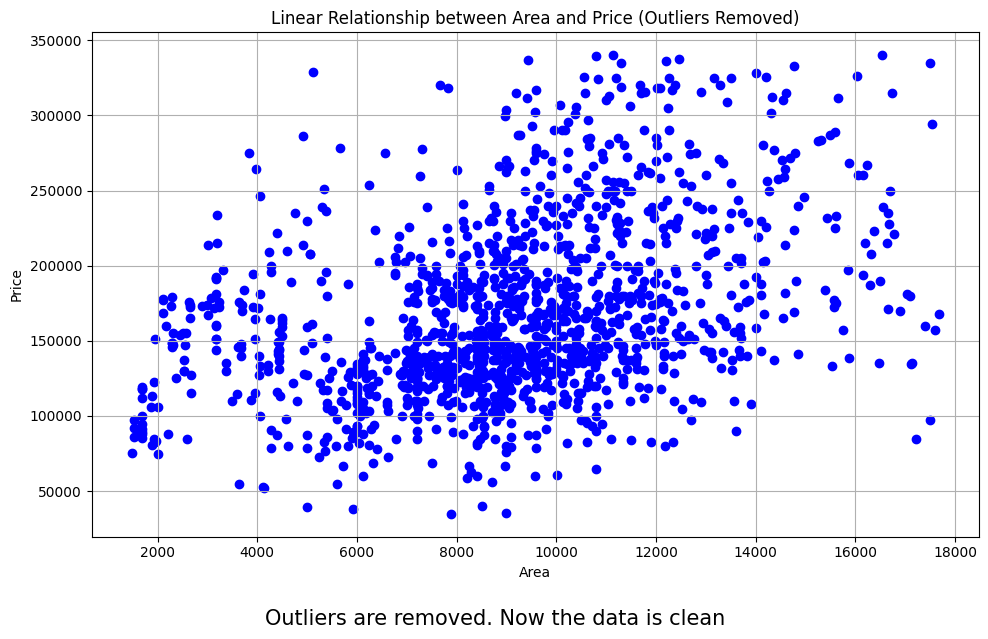

In [146]:

plt.figure(figsize=(10,6))
plt.scatter(df_clean['area'], df_clean['price'], color='blue')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Relationship between Area and Price (Outliers Removed)')
plt.figtext(0.5,-0.05, s='Outliers are removed. Now the data is clean', ha='center', fontsize=15)
plt.tight_layout()
plt.grid()
plt.show()


**Analysis of the cleaned data**

In [106]:
df_clean.shape

(1339, 2)

In [107]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1339 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    1339 non-null   int64
 1   price   1339 non-null   int64
dtypes: int64(2)
memory usage: 31.4 KB


In [108]:
df_clean.describe()

,area,price
count,1339.000000,1339.000000
mean,9139.618372,168946.625840
std,3152.249870,58972.615378
min,1491.000000,34900.000000
25%,7313.500000,128000.000000
50%,9158.000000,157900.000000
75%,11034.500000,201000.000000
max,17671.000000,340000.000000


**Dividing the data into X and Y**

In [109]:
X = df_clean[['area']]
Y = df_clean[['price']]

In [110]:
print(X)

       area
0      8450
1      9600
2     11250
3      9550
4     14260
...     ...
1455   7917
1456  13175
1457   9042
1458   9717
1459   9937

[1339 rows x 1 columns]


In [111]:
print(Y)

       price
0     208500
1     181500
2     223500
3     140000
4     250000
...      ...
1455  175000
1456  210000
1457  266500
1458  142125
1459  147500

[1339 rows x 1 columns]


**----- BUILDING A MODEL -----**

**Splitting the data for training and testing**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=54) #Splitting the data(80% for train, 20% for test)

In [ ]:
print(X_train.shape) #dimensions of the splitted data
print(Y_train.shape)

(1071, 1)
(1071, 1)


In [ ]:
print(X_test.shape) #dimensions of the splitted data
print(Y_test.shape)

(268, 1)
(268, 1)


**Initializing a model and training it**

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train) #training

LinearRegression()

**Prediction on test data**

In [134]:
y_pred = model.predict(X_test)
print(y_pred)

[[139432.91907955]
 [174975.7819083 ]
 [170912.44569881]
 [209876.66782663]
 [170776.49764719]
 [118406.28709586]
 [161939.87429198]
 [147536.93348993]
 [171494.00125295]
 [130256.42559529]
 [184816.91031159]
 [140173.08069392]
 [156562.3735835 ]
 [128126.5727866 ]
 [127673.41261453]
 [176954.58132631]
 [158790.41109614]
 [175527.12678431]
 [186584.23498263]
 [175496.91610617]
 [177709.84827974]
 [181727.86847203]
 [114418.47758171]
 [146139.68962607]
 [180232.43990422]
 [154296.57272319]
 [232111.72693582]
 [178465.11523318]
 [189794.11953474]
 [196100.59859594]
 [155958.16002075]
 [164016.85841393]
 [210193.87994707]
 [169069.59433242]
 [187649.16138697]
 [187868.18880347]
 [112605.83689346]
 [189794.11953474]
 [231333.80197378]
 [161532.03013712]
 [203018.84388942]
 [163435.30285978]
 [116661.62043342]
 [172422.97960568]
 [183298.82373518]
 [178125.24510413]
 [175444.04741943]
 [159817.57415282]
 [180239.99257376]
 [163359.77616444]
 [161282.79204249]
 [163888.46303184]
 [196576.416

**----- MODEL EVALUATION ----**

**Prediction using manual input**

In [131]:
x = 2645
landarea = [[x]]
prediction = model.predict(landarea)
print(prediction)


[[119894.16299413]]


c:\Users\perug\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**applying y=mx+c formula to find the coefficient and intercept**

In [133]:
m=model.coef_
print(m)

b=model.intercept_
print(b)

y = m*x + b
print("The Price of {0} Square feet Land is: {1}".format(x,y[0]))

[[7.55266953]]
[99917.35207572]
The Price of 2645 Square feet Land is: [119894.16299413]


**Finding MAE, MSE, RMSE, R2 score**

In [142]:
mae = mean_absolute_error(Y_test, y_pred)
mse  =mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

print(f'MAE = ₹{mae:.2f}')
print(f'MSE = ₹{mse:.2f}')
print(f'RMSE = ₹{rmse:.2f}')
print(f'R2 score = {r2:.2f}')

MAE = ₹44346.12
MSE = ₹3024915810.04
RMSE = ₹54999.23
R2 score = 0.11
